# Simple application of the nural network. The idea is taken from the Bishop book.



In my case, 2 features in the input, thus two input section and one is for the bias. I chose 4 hidden layer. I had used the soft max approach, so my output has two output section, one for the label 0 and one is for the other label 1.

$$a_1=W_1^T X+b_1$$
$$z_1=sig(a_1)$$
$$a_2=W_2^T+b_2$$
$$z_2=\frac{exp(a_2)}{(\sum (exp(a))}$$

$$\delta_2=(z_2-t) \ \text{where t is 1-K coding and takes value 1 if present 0 otherwise: detail from the Bishop}$$

$$\frac{dE}{dW_2}=dW_2=z_1^T\delta_2 $$
$$\delta_1=\delta_2 W_2^T  sig'(a_1)$$

$$\frac{dE}{dW_1}=dW_2=X^T\delta_1 $$


use the gradient descent:
$$W=W-\epsilon dw$$
That is the simple formula.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

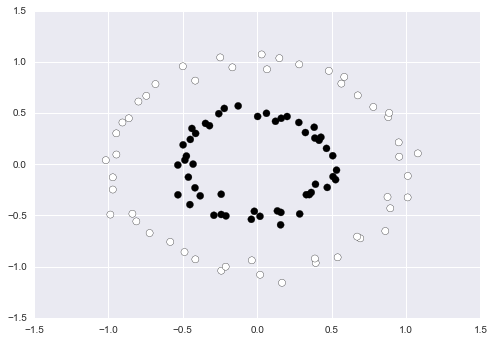

In [19]:
from sklearn.datasets import make_circles
X, y = make_circles(factor=0.5, random_state=0, noise=0.05)

# scatter plot of original and reduced data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.show()


In [27]:
n_input=2
n_hidden=4
n_output=2
epsilon=0.01
def sigmoid(x):
    return 1/(1+np.exp(-x))
def d_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))


In [28]:
W1=np.random.rand(n_input,n_hidden)
b1=np.random.rand(n_hidden)
W2=np.random.rand(n_hidden,n_output)
b2=np.random.rand(n_output)


In [78]:
for i in range(10000):
    a1=np.dot(X,W1)+b1
    z1=sigmoid(a1)
    
    a2=np.dot(z1,W2)+b2
    z2=np.exp(a2)
    z2=z2/(np.sum(z2,axis=1,keepdims=True))
    
    loss=np.sum(-np.log(z2[range(len(X)),y]))
    
    if loss and i%500==0:
        print 'iteration %i: %f' %(i,loss)
    
    delta2=z2
    delta2[range(len(X)),y]=delta2[range(len(X)),y]-1
    
    dW2=np.dot(z1.T,delta2)
    W2=W2-epsilon*dW2
    
    db2=np.sum(delta2,axis=0)
    b2=b2-epsilon*db2
    
    delta1=np.dot(delta2,W2.T)*d_sigmoid(a1)
    dW1=np.dot(X.T,delta1)
    W1=W1-epsilon*dW1
    
    db1=np.sum(delta1,axis=0)
    b1=b1-epsilon*db1
    
    
    

iteration 0: 1.744529
iteration 500: 1.384720
iteration 1000: 1.150201
iteration 1500: 0.984213
iteration 2000: 0.860141
iteration 2500: 0.763729
iteration 3000: 0.686599
iteration 3500: 0.623475
iteration 4000: 0.570857
iteration 4500: 0.526328
iteration 5000: 0.488160
iteration 5500: 0.455084
iteration 6000: 0.426147
iteration 6500: 0.400619
iteration 7000: 0.377933
iteration 7500: 0.357638
iteration 8000: 0.339375
iteration 8500: 0.322853
iteration 9000: 0.307833
iteration 9500: 0.294118


In [83]:
def prediction(W1,W2, b1,b2,X):
    a1=np.dot(X,W1)+b1
    z1=sigmoid(a1)
    
    a2=np.dot(z1,W2)+b2
    z2=np.exp(a2)
    z2=z2/(np.sum(z2))
    return np.argmax(z2)


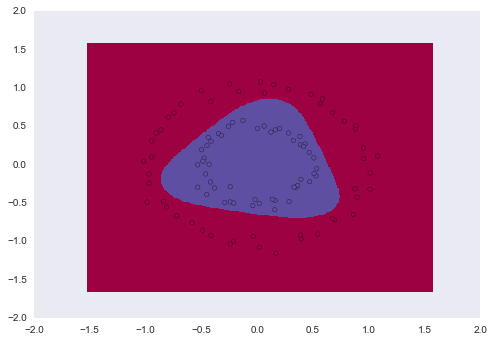

In [84]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = (np.c_[xx.ravel(), yy.ravel()])

m=Z.shape[0]
labels=[]
for i in range(m):
    myvalue=prediction(W1,W2, b1,b2,Z[i])
    if myvalue==1:
        label=1
    elif myvalue==0:
        label=0
    labels.append(label)
    
labels=np.array(labels)
labels=labels.reshape(xx.shape)
plt.pcolormesh(xx, yy, labels, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()